In [12]:
import numpy as np

class Perceptron(object):
    """
    params:
    
    eta-learning rate
    n_iter:int iterations through data set
    random_state : int initial state for the generator of random numbers
    
    attributes:
    
    w_ - vector of weights
    
    errors_ -vector of errors /incorrect classifications
    
    
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state =1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
            
    def fit(self, X, y):
        "fits training data"
        
        """
        X - matrix of features and training samples shape =[n_examples, n_features]
        
        y - column vector of target values shape =[n_examples,1]
        
        returns self: object
        
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size = 1 +X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int( update != 0.0)
            self.errors_.append(errors)    
        
        return self
    
    
    def net_input(self, X):
        "Compute net input"
        return X @ self.w_[1:] + self.w_[0]
    
    def predict(self, X):
        "return a label after each iteration"
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Download the data set


In [7]:
import os 
import pandas as pd

s = os.path.join('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
print('URL:', s)


df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Now extract data samples for the algortihm


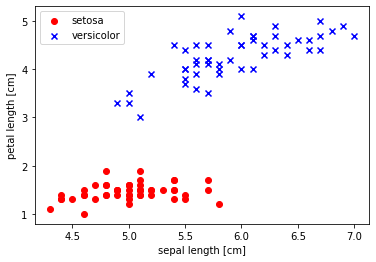

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# pick iris setosa and iris versicolor
y = df.iloc[0:100,4].values
y = np.where( y =='Iris-setosa', -1, 1)

# extract petal and sepal length
X = df.iloc[0:100,[0, 2]].values

# plot
plt.scatter(X[:50, 0], X[:50, 1],
           color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='b', marker='x', label='versicolor' )
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Train the perceptron


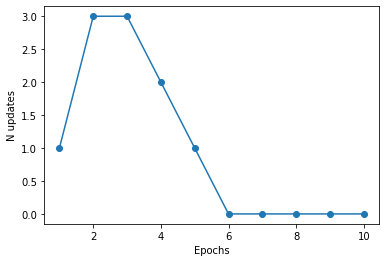

In [14]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_)+1),
        ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('N updates')
plt.show()

Perceptron converges after 6 epochs. Now we plot the margin of classification



In [19]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution = 0.02):
    markers = ('s', 'x', 'o', '4', '4')
    colors = ('r', 'b', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # show the decision region
    x1_min, x1_max = X[:, 0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # display by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[ y == cl, 0],
                    y=X[y == cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label =cl)

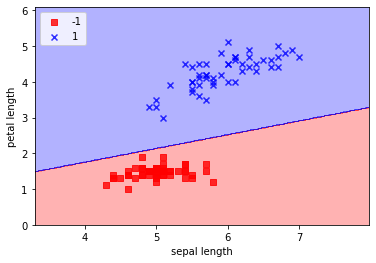

In [23]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

# ADALINE 


In [44]:
class AdalineGD(object):
    """  hyperparams:
    
    eta-learning rate
    n_iter:int iterations through data set
    
    
    
    random_state : int initial state for the generator of random numbers
    
    attributes:
    
    w_ - vector of weights
    
    errors_ -vector of errors /incorrect classifications"""
    
    
    
    def __init__(self, eta=0.01, n_iter=50, random_state =1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
            
            
    def fit(self, X, y):
        "fits training data"
        
        """
        X - matrix of features and training samples shape =[n_examples, n_features]
        
        y - column vector of target values shape =[n_examples,1]
        
        returns self: object
        
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size = 1 +X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)    
        
        return self 
    
    def net_input(self, X):
        "Compute net input"
        return X @ self.w_[1:] + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        "return a label after each iteration"
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    
    
    

# Perceptron's hyperparameters
$\eta$ -learning rate 


$n_{iter/epoch}$ - number of epochs

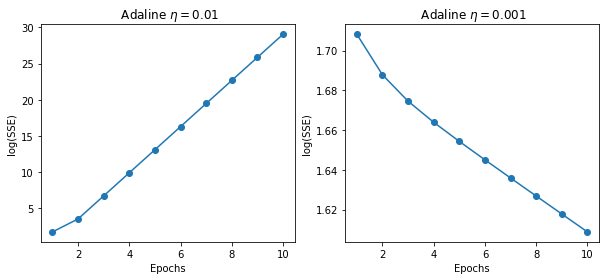

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_)+1),
         np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(SSE)")
ax[0].set_title(' Adaline $\eta = 0.01$')


ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
ax[1].plot(range(1, len(ada2.cost_)+1),
        np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("log(SSE)")
ax[1].set_title(' Adaline $\eta = 0.001$')

plt.show()


# Standardization

In [58]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

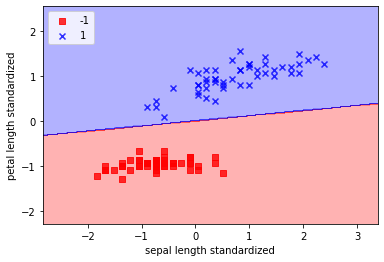

In [59]:
ada_stdgd = AdalineGD(n_iter=15, eta=0.01).fit(X_std,y)

plot_decision_regions(X_std, y, classifier=ada_stdgd)
plt.xlabel('sepal length standardized')
plt.ylabel('petal length standardized')
plt.legend(loc='upper left')
plt.show()

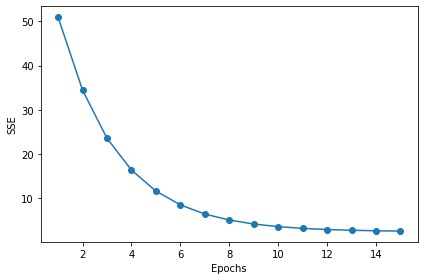

In [60]:
plt.plot(range(1, len(ada_stdgd.cost_)+1), 
        ada_stdgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.tight_layout()

plt.show()


# Adaline SGD


In [68]:
class AdalineSGD(object):
    """  hyperparams:
    
    eta-learning rate
    n_iter:int iterations through data set
    
    shuffle:bool -shuffles training data
    
    random_state : int initial state for the generator of random numbers
    
    attributes:
    
    w_ - vector of weights
    
    errors_ -vector of errors /incorrect classifications"""
    
    
    
    def __init__(self, eta=0.01, n_iter=50, random_state = None, shuffle=True):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.shuffle = shuffle
        self.w_initialized = False
            
            
    def fit(self, X, y):
        "fits training data"
        
        """
        X - matrix of features and training samples shape =[n_examples, n_features]
        
        y - column vector of target values shape =[n_examples,1]
        
        returns self: object
        
        """
        
        self._initialize_weights(X.shape[1])
        self.cost_ = []
       
        
        
        for i in range(self.n_iter):
            
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost =[]    
            for xi, target in zip(X,y):
                cost.append(self._update_weigths(xi,target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)    
        
        return self
    
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0]>1:
            for xi, target in zip(X, y):
                self._update_weigths(xi, target)
        else:
            self._update_weigths(X,y)
            
        return self            
                
    
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale =0.01, size = 1+m)
        self.w_initialized = True
    
    def _update_weigths(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        "Compute net input"
        return X @ self.w_[1:] + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        "return a label after each iteration"
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    
    
    

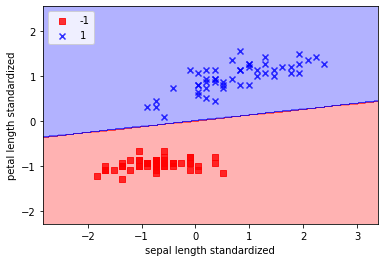

In [69]:
ada_SGD = AdalineSGD(n_iter=15, eta=0.01,random_state=1).fit(X_std,y)

plot_decision_regions(X_std, y, classifier=ada_SGD)
plt.xlabel('sepal length standardized')
plt.ylabel('petal length standardized')
plt.legend(loc='upper left')
plt.show()

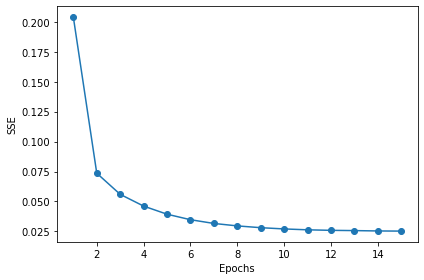

In [70]:
plt.plot(range(1, len(ada_SGD.cost_)+1), 
        ada_SGD.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.tight_layout()

plt.show()
